(0pts) Load the attached data into a pandas dataframe: diamonds.csv
This dataset contains the price of diamonds based on various attributes. For more information about the variables, read the description on kaggle.com to an external site.

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

diamonds_df = pd.read_csv('diamonds.csv', delimiter = ',')
diamonds_df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


(5 pts) Select any two variables of your choice and explain its statistical summary, e.g. mean, median, min, max, etc.
Note: you can use the .describe() method from the dataframe to obtain the descriptive statistics, or any suitable approach.

In [3]:
diamonds_df['price'].describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

This provides the descriptive stats for the price of diamonds in this data set. The mean of the set is 3,932.80 dollars. The median is 2,401 dollars. The minimum and maximum were 326 dollars and 18,823 dollars, respectively. 

In [4]:
diamonds_df['carat'].describe()

count    53940.000000
mean         0.797940
std          0.474011
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

This provides the descriptive stats for the carats of diamonds in this data set. The mean of the set is 0.7979cts. The median is 0.7cts. The minimum and maximum were 0.2cts and 5.01cts, respectively. 

(5 pts) Create a bar chart that shows the frequency of diamonds grouped by cut. Explain the chart.

In [6]:
cut_df = diamonds_df.groupby(['cut'], as_index=False).count()
cut_df

,cut,Unnamed: 0,carat,color,clarity,depth,table,price,x,y,z
0,Fair,1610,1610,1610,1610,1610,1610,1610,1610,1610,1610
1,Good,4906,4906,4906,4906,4906,4906,4906,4906,4906,4906
2,Ideal,21551,21551,21551,21551,21551,21551,21551,21551,21551,21551
3,Premium,13791,13791,13791,13791,13791,13791,13791,13791,13791,13791
4,Very Good,12082,12082,12082,12082,12082,12082,12082,12082,12082,12082


Text(0.5, 1.0, 'Frequency of Diamonds by Cut')

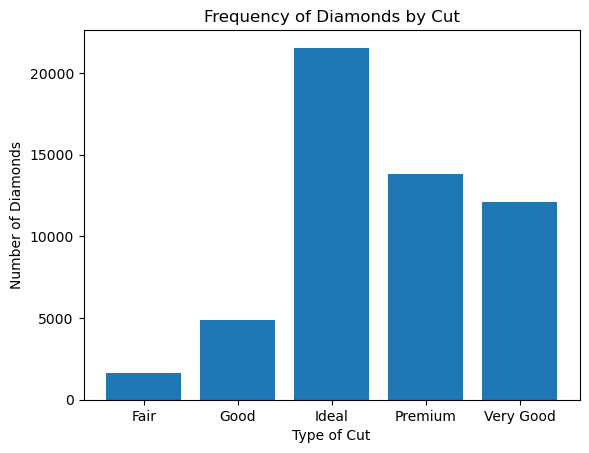

In [12]:
plt.bar(x=cut_df['cut'], height=cut_df['Unnamed: 0'])

plt.ylabel('Number of Diamonds')
plt.xlabel('Type of Cut')
plt.title('Frequency of Diamonds by Cut')

The above bar chart demonstrates the frequency of diamonds by type of cut. As shown, the 'Ideal' cut is the most frequent, while 'Fair' cut is the least frequent.

(5 pts) Create a scatterplot that shows the relationship between carat and price. Explain the chart and comment on the relationship between the variables.

Text(0.5, 1.0, 'Price vs. Carat Size of Diamonds')

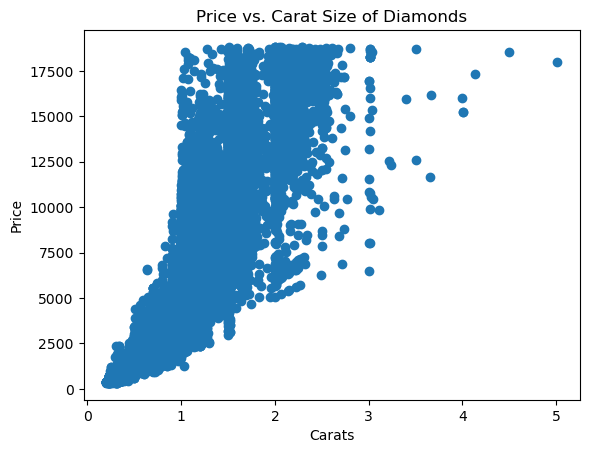

In [14]:
plt.scatter(diamonds_df['carat'], diamonds_df['price'])
plt.xlabel('Carats')
plt.ylabel('Price')
plt.title('Price vs. Carat Size of Diamonds')

The scatterplot above plots the carats of a diamond on the x-axis and the price of that diamond on the y-axis. There appears to be a very strong positive correlation early on, between 0 and 1.5 carats, followed by a weaker, yet still observable relationship up until the 3 carat mark. Past the 3 carat mark, the relationship appears to regain its strength. 

(10 pts) Calculate the Pearson Correlation coefficient of carat and price. Explain the results and discuss the strength of the correlation.

In [21]:
corr, p_value = stats.pearsonr(diamonds_df['carat'], diamonds_df['price'])
print('The correlation coefficient is:', corr)
print('The p-value is:', p_value)

The correlation coefficient is: 0.9215913011934767
The p-value is: 0.0


The correlation coefficient between carats and price reflects 0.92, which denotes a strong positive correlation.

(15 pts) Create a histogram (or boxplot) that shows the distribution of prices based on the quality of the cut. Explain the charts and skew.
Note: this question is asking you to show the distribution of diamond prices for each cut. There should be a separate histogram/boxplot for each cut.

Text(0.5, 1.0, 'Price Frequency of Fair-Cut Diamonds')

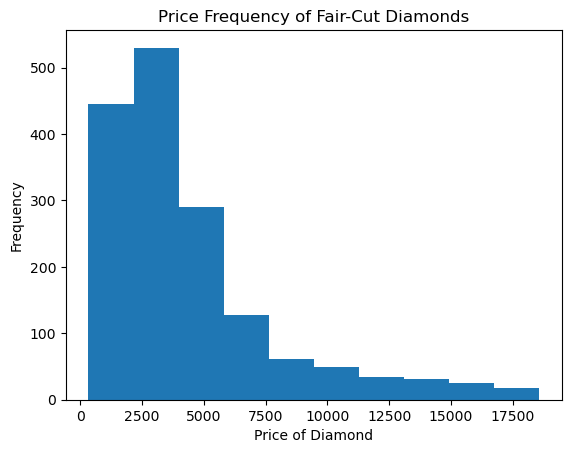

In [36]:
fair_df = diamonds_df.loc[diamonds_df['cut'].isin(['Fair'])]
plt.hist(fair_df['price'])
plt.xlabel('Price of Diamond')
plt.ylabel('Frequency')
plt.title('Price Frequency of Fair-Cut Diamonds')

Text(0.5, 1.0, 'Price Frequency of Good-Cut Diamonds')

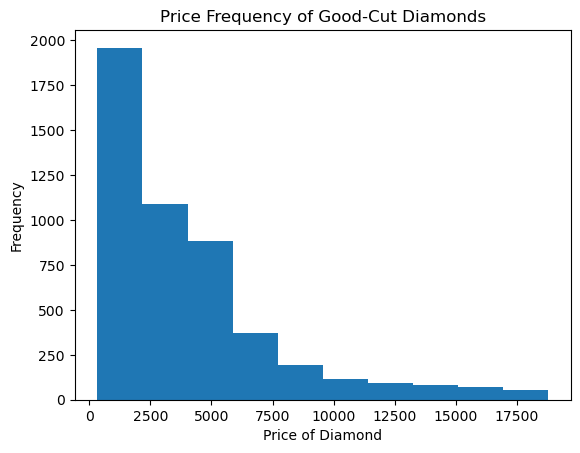

In [38]:
good_df = diamonds_df.loc[diamonds_df['cut'].isin(['Good'])]
plt.hist(good_df['price'])
plt.xlabel('Price of Diamond')
plt.ylabel('Frequency')
plt.title('Price Frequency of Good-Cut Diamonds')

Text(0.5, 1.0, 'Price Frequency of Ideal-Cut Diamonds')

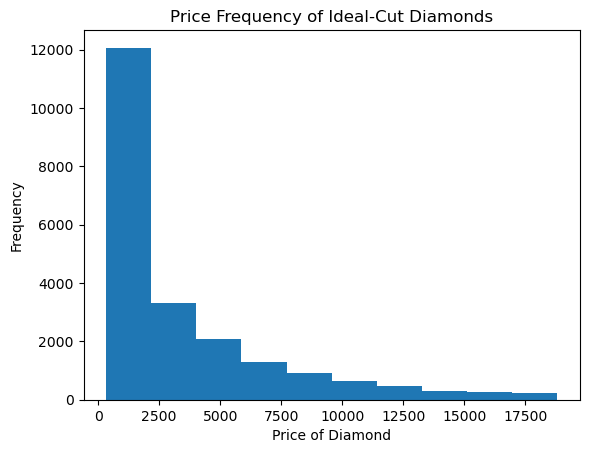

In [39]:
ideal_df = diamonds_df.loc[diamonds_df['cut'].isin(['Ideal'])]
plt.hist(ideal_df['price'])
plt.xlabel('Price of Diamond')
plt.ylabel('Frequency')
plt.title('Price Frequency of Ideal-Cut Diamonds')

Text(0.5, 1.0, 'Price Frequency of Premium-Cut Diamonds')

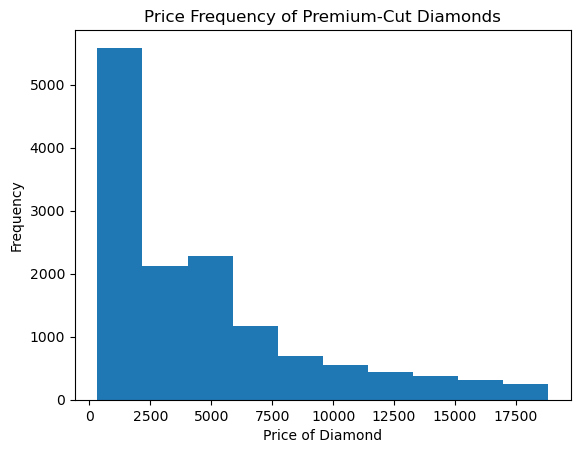

In [40]:
premium_df = diamonds_df.loc[diamonds_df['cut'].isin(['Premium'])]
plt.hist(premium_df['price'])
plt.xlabel('Price of Diamond')
plt.ylabel('Frequency')
plt.title('Price Frequency of Premium-Cut Diamonds')

Text(0.5, 1.0, "Price Frequency of 'Very Good'-Cut Diamonds")

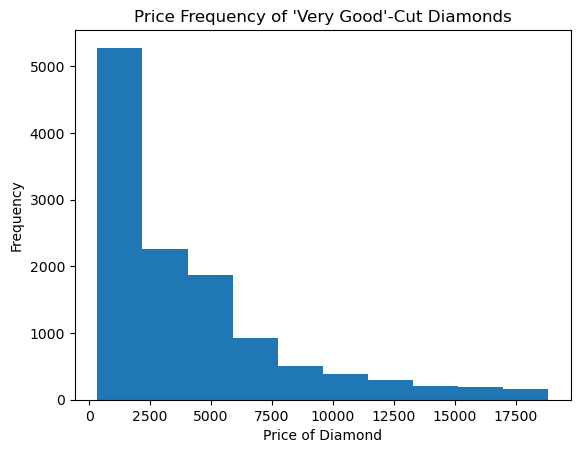

In [41]:
vgood_df = diamonds_df.loc[diamonds_df['cut'].isin(['Very Good'])]
plt.hist(vgood_df['price'])
plt.xlabel('Price of Diamond')
plt.ylabel('Frequency')
plt.title("Price Frequency of 'Very Good'-Cut Diamonds")

The above histograms shows the price distribution of each respective types of cuts. They're all right-skewed, implying that diamonds at increasingly high prices are decreasingly common. 

(10 pts) Using a 2-sample t-test, determine if there is a statistical difference between the price of diamonds with a cut that is considered:
'Good' vs 'Very Good'
'Premium' vs 'Ideal'
- set alpha to 5% i.e. 0.05.


In [46]:
good_sample = good_df['price']
vgood_sample = vgood_df['price']

alpha = 0.05
t_stat, p_value = stats.ttest_ind(good_sample, vgood_sample)

if(p_value < alpha):
    print('The price of Good-Cut vs. Very Good-Cut diamonds is statistically different')
else:
    print('The price of Good-Cut vs. Very Good-Cut diamonds is not statistically different')


The price of Good-Cut vs. Very Good-Cut diamonds is not statistically different


In [47]:
ideal_sample = ideal_df['price']
premium_sample = premium_df['price']

alpha = 0.05
t_stat, p_value = stats.ttest_ind(ideal_sample, premium_sample)

if(p_value < alpha):
    print('The price of Premium-Cut vs. Ideal-Cut diamonds is statistically different')
else:
    print('The price of Premium-Cut vs. Ideal-Cut diamonds is not statistically different')

    

The price of Premium-Cut vs. Ideal-Cut diamonds is statistically different
